In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
mount_dir="/content/drive/MyDrive"
this_dir=mount_dir+"/git_repos/probspace/野菜取引価格の予測"

Mounted at /content/drive


In [2]:
price_df=pd.read_csv(this_dir+"/data/price_df.csv",index_col=0)
weather_df=pd.read_csv(this_dir+"/data/weather_df.csv",index_col=0)

# データを扱いやすいように再構築

## price_df

In [ ]:
#price読み込み
raw_price_df=pd.read_csv(this_dir+"/data/train_data.csv")
raw_price_df.head()

,id,えのきだけ_中国,えのきだけ_九州,えのきだけ_北海道,えのきだけ_北陸,えのきだけ_四国,えのきだけ_東北,えのきだけ_東海,えのきだけ_近畿,えのきだけ_関東,...,レタス_関東,生しいたけ_中国,生しいたけ_九州,生しいたけ_北海道,生しいたけ_北陸,生しいたけ_四国,生しいたけ_東北,生しいたけ_東海,生しいたけ_近畿,生しいたけ_関東
0,2016-01-01,314.0,301.0,304.0,274.0,267.0,213.0,278.0,285.0,279.0,...,271.0,1098.0,1048.0,737.0,1231.0,1021.0,988.0,1119.0,1113.0,1118.0
1,2016-02-01,306.0,316.0,309.0,288.0,293.0,278.0,286.0,295.0,291.0,...,311.0,1080.0,956.0,750.0,1241.0,1037.0,964.0,1139.0,1127.0,1116.0
2,2016-03-01,245.0,217.0,317.0,219.0,227.0,164.0,210.0,213.0,204.0,...,278.0,946.0,739.0,728.0,1202.0,886.0,941.0,989.0,937.0,1044.0
3,2016-04-01,227.0,182.0,304.0,195.0,202.0,153.0,205.0,203.0,189.0,...,209.0,875.0,749.0,734.0,1014.0,827.0,887.0,924.0,882.0,982.0
4,2016-05-01,232.0,202.0,306.0,206.0,215.0,170.0,221.0,220.0,206.0,...,165.0,886.0,821.0,710.0,1055.0,892.0,867.0,942.0,946.0,990.0


### 再構築

In [ ]:
# date veg region price
price_df=pd.DataFrame([],columns=['date', 'veg', 'region', 'price'])
df_len=len(raw_price_df["id"].values)
for col in raw_price_df.columns[1:]:
  veg,region=col.split("_")
  tmp_df=pd.DataFrame({'date':raw_price_df["id"].values, 'veg':[veg]*df_len, 'region':[region]*df_len, 'price':raw_price_df[col].values})
  tmp_df["date"]=pd.to_datetime(tmp_df["date"])
  price_df=pd.concat([price_df,tmp_df], ignore_index=True)
price_df.head()
#price_df.info()

,date,veg,region,price
0,2016-01-01,えのきだけ,中国,314.0
1,2016-02-01,えのきだけ,中国,306.0
2,2016-03-01,えのきだけ,中国,245.0
3,2016-04-01,えのきだけ,中国,227.0
4,2016-05-01,えのきだけ,中国,232.0


### export

In [ ]:
price_df.to_csv(this_dir+"/data/price_df.csv")

## weather_df

### データ読み込み

In [ ]:
#weather読み込み
raw_weather_df=pd.read_csv(this_dir+"/data/weather.csv")
raw_weather_df.head()

,Unnamed: 0,宗谷,宗谷.1,宗谷.2,宗谷.3,宗谷.4,宗谷.5,宗谷.6,宗谷.7,宗谷.8,...,沖縄.126,沖縄.127,沖縄.128,沖縄.129,沖縄.130,沖縄.131,沖縄.132,沖縄.133,沖縄.134,沖縄.135
0,NaN,稚内,稚内,稚内,稚内,稚内,稚内,稚内,稚内,稚内,...,南大東（南大東島）,南大東（南大東島）,南大東（南大東島）,南大東（南大東島）,南大東（南大東島）,南大東（南大東島）,南大東（南大東島）,南大東（南大東島）,南大東（南大東島）,南大東（南大東島）
1,NaN,平均気温(℃),日平均気温25℃以上日数(日),日最高気温の平均(℃),日平均気温0℃未満日数(日),日最低気温の平均(℃),日最高気温25℃以上日数(日),最高気温(℃),日最高気温0℃未満日数(日),最低気温(℃),...,日最高気温0℃未満日数(日),最低気温(℃),日最低気温25℃以上日数(日),日最低気温0℃未満日数(日),降水量の合計(mm),日降水量の最大(mm),最深積雪(cm),降雪量合計(cm),日照時間(時間),日照時間0.1時間未満日数(日)
2,年月,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015/1,-2.9,0.0,-1.1,28.0,-5.0,0.0,4.3,19.0,-8.1,...,0.0,7.3,0.0,0.0,42.0,14.5,0.0,0.0,99.8,5.0
4,2015/2,-1.7,0.0,0.2,21.0,-4.0,0.0,5.3,14.0,-11.0,...,0.0,5.8,0.0,0.0,7.0,4.5,0.0,0.0,126.7,1.0


### 地名から地域名の対応表 by ChatGPT

In [ ]:
places=[p for p in list(set(raw_weather_df.loc[0,:])) if type(p) is str]
regions=['中国', '中部', '九州', '北海道', '北陸', '四国', '東北', '沖縄', '関東', '関西']
#地名一覧
areas=[col for col in raw_weather_df.columns if '.' not in col][1:]

In [ ]:
area_region = {
    '宗谷': '北海道',
    '留萌': '北海道',
    '上川': '北海道',
    '網走・北見・紋別': '北海道',
    '空知': '北海道',
    '後志': '北海道',
    '石狩': '北海道',
    '日高': '北海道',
    '十勝': '北海道',
    '根室': '北海道',
    '檜山': '北海道',
    '胆振': '北海道',
    '釧路': '北海道',
    '渡島': '北海道',
    '青森': '東北',
    '秋田': '東北',
    '岩手': '東北',
    '石川': '北陸',
    '山形': '東北',
    '宮城': '東北',
    '富山': '北陸',
    '新潟': '中部',
    '福島': '東北',
    '山口': '中国',
    '島根': '中国',
    '鳥取': '中国',
    '兵庫': '関西',
    '京都': '関西',
    '福井': '北陸',
    '岐阜': '中部',
    '長野': '中部',
    '群馬': '関東',
    '栃木': '関東',
    '茨城': '関東',
    '広島': '中国',
    '岡山': '中国',
    '滋賀': '関西',
    '山梨': '中部',
    '埼玉': '関東',
    '長崎': '九州',
    '佐賀': '九州',
    '福岡': '九州',
    '大阪': '関西',
    '奈良': '関西',
    '三重': '中部',
    '愛知': '中部',
    '静岡': '中部',
    '神奈川': '関東',
    '東京': '関東',
    '千葉': '関東',
    '熊本': '九州',
    '大分': '九州',
    '愛媛': '四国',
    '香川': '四国',
    '和歌山': '関西',
    '鹿児島': '九州',
    '宮崎': '九州',
    '高知': '四国',
    '徳島': '四国',
    '沖縄': '沖縄'
}

In [ ]:
region_area={r:[a for a,v in area_region.items() if v==r] for r in regions}
region_area

{'中国': ['山口', '島根', '鳥取', '広島', '岡山'],
 '中部': ['新潟', '岐阜', '長野', '山梨', '三重', '愛知', '静岡'],
 '九州': ['長崎', '佐賀', '福岡', '熊本', '大分', '鹿児島', '宮崎'],
 '北海道': ['宗谷',
  '留萌',
  '上川',
  '網走・北見・紋別',
  '空知',
  '後志',
  '石狩',
  '日高',
  '十勝',
  '根室',
  '檜山',
  '胆振',
  '釧路',
  '渡島'],
 '北陸': ['石川', '富山', '福井'],
 '四国': ['愛媛', '香川', '高知', '徳島'],
 '東北': ['青森', '秋田', '岩手', '山形', '宮城', '福島'],
 '沖縄': ['沖縄'],
 '関東': ['群馬', '栃木', '茨城', '埼玉', '神奈川', '東京', '千葉'],
 '関西': ['兵庫', '京都', '滋賀', '大阪', '奈良', '和歌山']}

In [ ]:
place_area={}
for p in places:
  place_area[p]=raw_weather_df.columns[raw_weather_df.loc[0,:]==p][0].split(".")[0]
place_area

{'雫石': '岩手',
 '都城': '宮崎',
 '千屋': '岡山',
 '宇登呂': '網走・北見・紋別',
 '占冠': '上川',
 '上野': '三重',
 '鷹巣': '秋田',
 '福岡': '福岡',
 '幾寅': '上川',
 '区界': '岩手',
 '大分': '大分',
 '朝日': '富山',
 '左沢': '山形',
 '深浦': '青森',
 '共和': '後志',
 '矢島': '秋田',
 '北見枝幸': '宗谷',
 '帯広': '十勝',
 '音威子府': '上川',
 '和歌山': '和歌山',
 '大船渡': '岩手',
 '白川': '岐阜',
 '紋別': '網走・北見・紋別',
 '宿毛': '高知',
 '秩父': '埼玉',
 '松江': '島根',
 '浦河': '日高',
 '稚内': '宗谷',
 '新川': '宮城',
 '今別': '青森',
 '豊富': '宗谷',
 '米子': '鳥取',
 '白糠': '釧路',
 '芦別': '空知',
 '山口': '山口',
 '酒田': '山形',
 '倉吉': '鳥取',
 '新篠津': '石狩',
 '守門': '新潟',
 '諏訪': '長野',
 '湯の岱': '秋田',
 '佐賀': '佐賀',
 '軽井沢': '長野',
 '中徹別': '釧路',
 '中杵臼': '日高',
 '大阪': '大阪',
 '藤原': '群馬',
 'つくば（館野）': '茨城',
 '苫小牧': '胆振',
 '室戸岬': '高知',
 '蘭越': '後志',
 '横手': '秋田',
 '浜松': '静岡',
 '日高': '日高',
 '宮古': '岩手',
 '美深': '上川',
 '信濃町': '長野',
 '白滝': '網走・北見・紋別',
 '山形': '山形',
 '夕張': '空知',
 '横浜': '神奈川',
 '柏崎': '新潟',
 '葛巻': '岩手',
 '河合': '岐阜',
 '遠野': '岩手',
 '横田': '島根',
 '草津': '群馬',
 '歌登': '宗谷',
 '八戸': '青森',
 '四日市': '三重',
 '御前崎': '静岡',
 '富山': '富山',
 '小浜': '福井',
 '滝上': '網

In [ ]:
area_place={a:[p for p,v in place_area.items() if v==a] for a in areas}
area_place

{'宗谷': ['北見枝幸', '稚内', '豊富', '歌登', '沼川', '中頓別', '浜鬼志別'],
 '留萌': ['天塩', '羽幌', '幌糠', '留萌', '初山別'],
 '上川': ['占冠',
  '幾寅',
  '音威子府',
  '美深',
  '上川',
  '富良野',
  '美瑛',
  '朱鞠内',
  '和寒',
  '名寄',
  '幌加内',
  '下川',
  '旭川'],
 '網走・北見・紋別': ['宇登呂',
  '紋別',
  '白滝',
  '滝上',
  '佐呂間',
  '雄武',
  '西興部',
  '留辺蘂',
  '遠軽',
  '北見',
  '斜里',
  '津別',
  '網走'],
 '空知': ['芦別', '夕張', '岩見沢', '美唄', '滝川', '深川'],
 '後志': ['共和', '蘭越', '黒松内', '倶知安', '寿都', '余市', '小樽', '喜茂別'],
 '石狩': ['新篠津', '厚田', '札幌', '恵庭島松', '石狩'],
 '日高': ['浦河', '中杵臼', '日高', '静内'],
 '十勝': ['帯広',
  '大樹',
  '新得',
  '上士幌',
  '芽室',
  '本別',
  '浦幌',
  '陸別',
  'ぬかびら源泉郷',
  '上札内',
  '広尾'],
 '根室': ['羅臼', '中標津', '根室', '別海', '厚床'],
 '檜山': ['今金', '鶉', '江差'],
 '胆振': ['苫小牧', '大滝', '白老', '大岸', '室蘭', '穂別', '登別'],
 '釧路': ['白糠', '中徹別', '標茶', '阿寒湖畔', '鶴居', '太田', '川湯', '釧路'],
 '渡島': ['八雲', '熊石', '函館', '森', '長万部'],
 '青森': ['深浦',
  '今別',
  '八戸',
  '酸ケ湯',
  '十和田',
  '青森',
  '三戸',
  '五所川原',
  '鰺ケ沢',
  '脇野沢',
  '弘前',
  '碇ケ関',
  'むつ',
  '野辺地',
  '大間'],
 '秋田': ['鷹巣',
  '矢島',
  '湯の岱',


In [ ]:
place_region={p:area_region[a] for p,a in place_area.items()}
place_region

{'雫石': '東北',
 '都城': '九州',
 '千屋': '中国',
 '宇登呂': '北海道',
 '占冠': '北海道',
 '上野': '中部',
 '鷹巣': '東北',
 '福岡': '九州',
 '幾寅': '北海道',
 '区界': '東北',
 '大分': '九州',
 '朝日': '北陸',
 '左沢': '東北',
 '深浦': '東北',
 '共和': '北海道',
 '矢島': '東北',
 '北見枝幸': '北海道',
 '帯広': '北海道',
 '音威子府': '北海道',
 '和歌山': '関西',
 '大船渡': '東北',
 '白川': '中部',
 '紋別': '北海道',
 '宿毛': '四国',
 '秩父': '関東',
 '松江': '中国',
 '浦河': '北海道',
 '稚内': '北海道',
 '新川': '東北',
 '今別': '東北',
 '豊富': '北海道',
 '米子': '中国',
 '白糠': '北海道',
 '芦別': '北海道',
 '山口': '中国',
 '酒田': '東北',
 '倉吉': '中国',
 '新篠津': '北海道',
 '守門': '中部',
 '諏訪': '中部',
 '湯の岱': '東北',
 '佐賀': '九州',
 '軽井沢': '中部',
 '中徹別': '北海道',
 '中杵臼': '北海道',
 '大阪': '関西',
 '藤原': '関東',
 'つくば（館野）': '関東',
 '苫小牧': '北海道',
 '室戸岬': '四国',
 '蘭越': '北海道',
 '横手': '東北',
 '浜松': '中部',
 '日高': '北海道',
 '宮古': '東北',
 '美深': '北海道',
 '信濃町': '中部',
 '白滝': '北海道',
 '山形': '東北',
 '夕張': '北海道',
 '横浜': '関東',
 '柏崎': '中部',
 '葛巻': '東北',
 '河合': '中部',
 '遠野': '東北',
 '横田': '中国',
 '草津': '関東',
 '歌登': '北海道',
 '八戸': '東北',
 '四日市': '中部',
 '御前崎': '中部',
 '富山': '北陸',
 '小浜': '北陸',
 '滝上':

### 再構築
["date","region","area","place",
'日最低気温0℃未満日数(日)',
 '日平均気温25℃以上日数(日)',
 '日最高気温25℃以上日数(日)',
 '最高気温(℃)',
 '最深積雪(cm)',
 '日最低気温25℃以上日数(日)',
 '日照時間(時間)',
 '日最低気温の平均(℃)',
 '日最高気温の平均(℃)',
 '日平均気温0℃未満日数(日)',
 '最低気温(℃)',
 '日照時間0.1時間未満日数(日)',
 '降水量の合計(mm)',
 '日最高気温0℃未満日数(日)',
 '日降水量の最大(mm)',
 '平均気温(℃)',
 '降雪量合計(cm)']

In [ ]:
#
date=raw_weather_df.iloc[3:,0].values+"/1"
df_len=len(date)
weather_df=pd.DataFrame([],columns=["date","region","area","place", '日最低気温0℃未満日数(日)', '日平均気温25℃以上日数(日)', '日最高気温25℃以上日数(日)', '最高気温(℃)', '最深積雪(cm)', '日最低気温25℃以上日数(日)', '日照時間(時間)', '日最低気温の平均(℃)', '日最高気温の平均(℃)', '日平均気温0℃未満日数(日)', '最低気温(℃)', '日照時間0.1時間未満日数(日)', '降水量の合計(mm)', '日最高気温0℃未満日数(日)', '日降水量の最大(mm)', '平均気温(℃)', '降雪量合計(cm)'])
for p in places:
  p_df=raw_weather_df.loc[:,raw_weather_df.loc[0,:]==p]
  area=place_area[p]
  region=area_region[area]
  tmp_dict={'date':date, 'place':[p]*df_len,"area":[area]*df_len,'region':[region]*df_len}
  tmp_dict.update({item[1]:item[3:].values for col,item in p_df.items()})
  tmp_df=pd.DataFrame(tmp_dict)
  tmp_df["date"]=pd.to_datetime(tmp_df["date"])
  weather_df=pd.concat([weather_df,tmp_df], ignore_index=True)
weather_df.head()

,date,region,area,place,日最低気温0℃未満日数(日),日平均気温25℃以上日数(日),日最高気温25℃以上日数(日),最高気温(℃),最深積雪(cm),日最低気温25℃以上日数(日),...,日最低気温の平均(℃),日最高気温の平均(℃),日平均気温0℃未満日数(日),最低気温(℃),日照時間0.1時間未満日数(日),降水量の合計(mm),日最高気温0℃未満日数(日),日降水量の最大(mm),平均気温(℃),降雪量合計(cm)
0,2015-01-01,東北,岩手,雫石,30.0,0.0,0.0,5.2,65.0,0.0,...,-5.8,1.1,26.0,-15.9,4.0,30.5,11.0,10.5,-2.0,111.0
1,2015-02-01,東北,岩手,雫石,26.0,0.0,0.0,7.5,77.0,0.0,...,-5.1,2.7,19.0,-12.5,3.0,63.5,2.0,12.0,-0.8,126.0
2,2015-03-01,東北,岩手,雫石,22.0,0.0,0.0,17.4,87.0,0.0,...,-1.8,7.4,3.0,-7.6,5.0,144.0,2.0,49.5,2.8,158.0
3,2015-04-01,東北,岩手,雫石,7.0,0.0,3.0,28.5,0.0,0.0,...,2.2,15.7,0.0,-2.4,4.0,116.5,0.0,31.0,8.9,0.0
4,2015-05-01,東北,岩手,雫石,1.0,0.0,8.0,29.9,0.0,0.0,...,8.2,21.8,0.0,-0.2,1.0,101.0,0.0,39.5,15.3,0.0


### export

In [ ]:
weather_df.to_csv(this_dir+"/data/weather_df.csv")

### それぞれの地域ごとの平均

In [ ]:
each_region_weather_df=weather_df.groupby(['date', 'region'], as_index=False).mean()
each_region_weather_df.head()

<ipython-input-6-e378721494af>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  each_region_weather_df=weather_df.groupby(['date', 'region'], as_index=False).mean()


,date,region,日最低気温0℃未満日数(日),日平均気温25℃以上日数(日),日最高気温25℃以上日数(日),最高気温(℃),最深積雪(cm),日最低気温25℃以上日数(日),日照時間(時間),日最低気温の平均(℃),日最高気温の平均(℃),日平均気温0℃未満日数(日),最低気温(℃),日照時間0.1時間未満日数(日),降水量の合計(mm),日最高気温0℃未満日数(日),日降水量の最大(mm),平均気温(℃),降雪量合計(cm)
0,2015-01-01,中国,13.041667,0.0,0.0,12.325000,27.050000,0.0,71.562500,0.425000,7.350000,3.416667,-3.875000,4.833333,176.500000,0.625000,38.437500,3.625000,75.500000
1,2015-01-01,中部,20.224490,0.0,0.0,10.797959,92.275000,0.0,106.108163,-1.867347,5.308163,11.000000,-6.573469,7.469388,177.846939,2.632653,30.540816,1.642857,148.875000
2,2015-01-01,九州,4.461538,0.0,0.0,17.219231,0.222222,0.0,129.892308,4.450000,12.219231,0.269231,-0.407692,3.230769,112.923077,0.038462,35.692308,8.280769,0.222222
3,2015-01-01,北海道,30.800000,0.0,0.0,5.160000,75.270000,0.0,91.469000,-9.399000,-0.606000,27.950000,-17.180000,6.660000,56.400000,17.640000,12.830000,-4.632000,118.810000
4,2015-01-01,北陸,15.411765,0.0,0.0,12.388235,50.941176,0.0,46.288235,-0.052941,5.876471,1.882353,-2.994118,10.529412,256.970588,0.058824,31.294118,2.664706,104.117647


In [ ]:
each_region_weather_df.to_csv(this_dir+"/data/each_region_weather_df.csv")

### それぞれのareaごとの平均

In [ ]:
each_area_weather_df=weather_df.groupby(['date', 'region','area'], as_index=False).mean()
each_area_weather_df.head()

<ipython-input-9-0031940e1f78>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  each_area_weather_df=weather_df.groupby(['date', 'region','area'], as_index=False).mean()


,date,region,area,日最低気温0℃未満日数(日),日平均気温25℃以上日数(日),日最高気温25℃以上日数(日),最高気温(℃),最深積雪(cm),日最低気温25℃以上日数(日),日照時間(時間),日最低気温の平均(℃),日最高気温の平均(℃),日平均気温0℃未満日数(日),最低気温(℃),日照時間0.1時間未満日数(日),降水量の合計(mm),日最高気温0℃未満日数(日),日降水量の最大(mm),平均気温(℃),降雪量合計(cm)
0,2015-01-01,中国,山口,7.0,0.0,0.0,13.600000,1.000000,0.0,96.100000,1.950000,10.050000,0.500000,-1.950000,2.500000,119.250000,0.000000,40.750000,5.950000,2.000000
1,2015-01-01,中国,岡山,18.6,0.0,0.0,11.900000,28.800000,0.0,77.840000,-0.640000,6.200000,5.400000,-5.740000,4.200000,176.300000,1.200000,37.700000,2.380000,95.400000
2,2015-01-01,中国,島根,16.0,0.0,0.0,11.771429,27.166667,0.0,56.742857,-0.028571,6.828571,4.285714,-4.042857,5.571429,181.142857,0.857143,39.785714,3.185714,79.666667
3,2015-01-01,中国,広島,13.4,0.0,0.0,12.580000,32.333333,0.0,99.380000,0.320000,7.600000,4.000000,-3.720000,3.000000,134.900000,0.600000,37.300000,3.720000,100.000000
4,2015-01-01,中国,鳥取,5.4,0.0,0.0,12.760000,27.200000,0.0,48.400000,1.620000,7.900000,0.800000,-2.700000,7.200000,234.700000,0.000000,37.500000,4.460000,50.600000


In [ ]:
each_area_weather_df.to_csv(this_dir+"/data/each_area_weather_df.csv")

### 天気情報の圧縮
https://qiita.com/koshian2/items/2e69cb4981ae8fbd3bda
次元削減の場合はなんとも言えない。可視化に近いような次元削減なら標準化したほうがいいし、パイプラインに近いような次元削減なら標準化しないほうが後続するパイプラインにより多くの情報を伝えられるかもしれない。標準化自体が1つのハイパーパラメーターなので、両方やって最終的に精度良いほうを取ればいい。

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(rw_df.iloc[:,2:])

PCA(n_components=3)

In [ ]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.69794154 0.90066388 0.96851252]


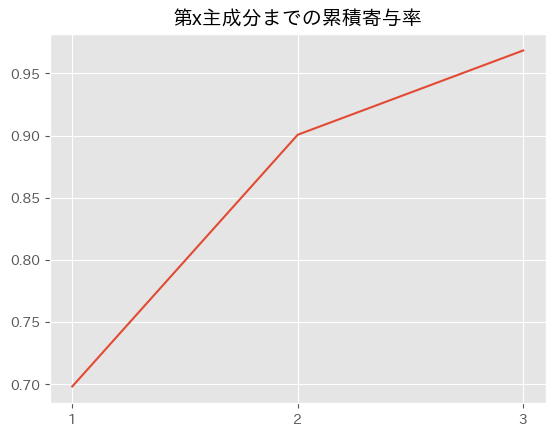

In [ ]:
fig, ax= plt.subplots()
plt.style.use("ggplot")
ax.set_xticks([0,1,2],[1,2,3])
ax.set_title("第x主成分までの累積寄与率")
ax.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [ ]:
pca_df=pd.DataFrame(pca.transform(rw_df.iloc[:,2:]),columns=["pca1","pca2","pca3"])
rw_pca_df=pd.concat([rw_df,pca_df],axis=1)
rw_pca_df.head()

,date,region,日最低気温0℃未満日数(日),日平均気温25℃以上日数(日),日最高気温25℃以上日数(日),最高気温(℃),最深積雪(cm),日最低気温25℃以上日数(日),日照時間(時間),日最低気温の平均(℃),...,最低気温(℃),日照時間0.1時間未満日数(日),降水量の合計(mm),日最高気温0℃未満日数(日),日降水量の最大(mm),平均気温(℃),降雪量合計(cm),pca1,pca2,pca3
0,2015-01-01,中国,13.041667,0.0,0.0,12.325000,27.050000,0.0,71.562500,0.425000,...,-3.875000,4.833333,176.500000,0.625000,38.437500,3.625000,75.500000,4.854736,105.814863,-0.315730
1,2015-01-01,中部,20.224490,0.0,0.0,10.797959,92.275000,0.0,106.108163,-1.867347,...,-6.573469,7.469388,177.846939,2.632653,30.540816,1.642857,148.875000,-9.361618,137.170069,95.562664
2,2015-01-01,九州,4.461538,0.0,0.0,17.219231,0.222222,0.0,129.892308,4.450000,...,-0.407692,3.230769,112.923077,0.038462,35.692308,8.280769,0.222222,-50.186609,8.552658,-33.955904
3,2015-01-01,北海道,30.800000,0.0,0.0,5.160000,75.270000,0.0,91.469000,-9.399000,...,-17.180000,6.660000,56.400000,17.640000,12.830000,-4.632000,118.810000,-126.870836,126.503494,50.293765
4,2015-01-01,北陸,15.411765,0.0,0.0,12.388235,50.941176,0.0,46.288235,-0.052941,...,-2.994118,10.529412,256.970588,0.058824,31.294118,2.664706,104.117647,76.684696,153.919135,20.874477


In [ ]:
rw_pca_df.to_csv(this_dir+"/data/rw_pca_df.csv")

# dfを合体

In [3]:
p_df=pd.read_csv(this_dir+"/data/price_df.csv",index_col=0)
w_df=pd.read_csv(this_dir+"/data/weather_df.csv",index_col=0)
rw_df=pd.read_csv(this_dir+"/data/each_region_weather_df.csv",index_col=0)
aw_df=pd.read_csv(this_dir+"/data/each_area_weather_df.csv",index_col=0)
rw_pca_df=pd.read_csv(this_dir+"/data/rw_pca_df.csv",index_col=0)

In [4]:
marged_price_weather_df=pd.merge(p_df, rw_pca_df, on=['date', 'region'])
marged_price_weather_df.head()

,date,veg,region,price,日最低気温0℃未満日数(日),日平均気温25℃以上日数(日),日最高気温25℃以上日数(日),最高気温(℃),最深積雪(cm),日最低気温25℃以上日数(日),...,最低気温(℃),日照時間0.1時間未満日数(日),降水量の合計(mm),日最高気温0℃未満日数(日),日降水量の最大(mm),平均気温(℃),降雪量合計(cm),pca1,pca2,pca3
0,2016-01-01,えのきだけ,中国,314.0,15.541667,0.0,0.0,15.2125,41.35,0.0,...,-7.2625,6.5,156.104167,1.375,40.458333,3.254167,80.45,-15.432198,111.114956,6.770552
1,2016-01-01,かぼちゃ,中国,358.0,15.541667,0.0,0.0,15.2125,41.35,0.0,...,-7.2625,6.5,156.104167,1.375,40.458333,3.254167,80.45,-15.432198,111.114956,6.770552
2,2016-01-01,かんしょ,中国,254.0,15.541667,0.0,0.0,15.2125,41.35,0.0,...,-7.2625,6.5,156.104167,1.375,40.458333,3.254167,80.45,-15.432198,111.114956,6.770552
3,2016-01-01,きゅうり,中国,433.0,15.541667,0.0,0.0,15.2125,41.35,0.0,...,-7.2625,6.5,156.104167,1.375,40.458333,3.254167,80.45,-15.432198,111.114956,6.770552
4,2016-01-01,こまつな,中国,457.0,15.541667,0.0,0.0,15.2125,41.35,0.0,...,-7.2625,6.5,156.104167,1.375,40.458333,3.254167,80.45,-15.432198,111.114956,6.770552


In [5]:
marged_price_weather_df.to_csv(this_dir+"/data/marged_price_weather_df.csv")